# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import jarque_bera
from scipy import stats

# Analysis:
<br>
<font size=3><b>1. Pandas: Used to deal with the manipulation and reading of .csv files. Also used for descriptive statistical        analysis of data.<br>
2. Numpy: Faster method to manipulate lists and functioning with arrays.<br>
3. Matplotlib: Used to implement different types of colorful graphs for better understanding of data.<br>
4. Scipy: Used to implement different types of statistical analysis (used here to check normality of data)<br></b></font>

# Importing Data from CSV file using Pandas

In [2]:
df = pd.read_csv("Covid_Stats.csv")
df.sample(15)

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,new_vaccinations,stringency_index
731,25/02/2022,1507657,1207,30153,14,0.55,26299843.0,41142.0,0.0297,33.7,NaN,NaN,65.28
551,29/08/2021,1156281,3800,25670,66,0.98,17647941.0,62918.0,0.0675,14.8,53314628.0,NaN,68.52
280,01/12/2020,403311,2829,8166,75,1.10,5549779.0,40969.0,0.0695,14.4,0.0,0.0,64.35
273,24/11/2020,382892,3009,7803,59,1.21,5256120.0,39165.0,0.0707,14.2,0.0,0.0,58.80
156,30/07/2020,277402,1114,5924,32,0.67,1973237.0,20507.0,0.0403,24.8,0.0,0.0,66.67
644,30/11/2021,1285254,414,28737,9,1.01,21985775.0,NaN,0.0089,112.0,NaN,NaN,43.06
149,23/07/2020,270400,1209,5763,54,0.67,1799290.0,22408.0,0.0849,11.8,0.0,0.0,66.67
460,30/05/2021,921053,2117,20779,43,0.80,13169358.0,55965.0,0.0447,22.3,NaN,NaN,63.43
196,08/09/2020,299659,426,6359,9,1.01,2802210.0,23521.0,0.0219,45.6,0.0,0.0,47.69
542,20/08/2021,1119970,3084,24848,65,0.96,17115272.0,51982.0,0.0665,15.0,45540221.0,NaN,68.52


# Analysis:
<br><font size=3>We have taken the dataset of related to COVID-19. This dataset has 797 rows and 13 columns consisting of COVID data in past two years i.e 2020 until present. In the columns we have the number of total cases (the total cases of COVID that are reported), new cases (as the cases kept on increasing so in this column we have the new cases that are being reported), total and new deaths, reproduction rate, total tests (cumulative number of tests), new test, positive rate (tests that resulted in positive), tests per case, total vaccinations(cumulative number of vaccines), new vaccinations and stringency index (the stringency index is a composite measure based on nine metrics which are school closures, workplace closures, cancellation of public events, restrictions on public gatherings, closure of public transport, stay at home requirements, public information campaigns, restrictions on internal movements and international travel controls).</font>


# Removing NaN values and displaying Data Sample 

In [3]:
df = df.replace('',np.nan)
df = df.dropna(axis="rows")
df.sample(15)

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,new_vaccinations,stringency_index
688,13/01/2022,1315834,3567,28999,7,1.91,23984502.0,49270.0,0.0446,22.4,166083807.0,786835.0,54.17
161,04/08/2020,280461,0,5999,0,0.69,2043870.0,11915.0,0.0464,21.5,0.0,0.0,66.67
342,01/02/2021,547648,1220,11746,63,0.86,7966981.0,34785.0,0.0409,24.4,0.0,0.0,50.46
70,05/05/2020,24073,2024,564,50,1.38,222404.0,9893.0,0.1311,7.6,0.0,0.0,89.81
256,07/11/2020,343189,1436,6968,25,1.34,4643913.0,34400.0,0.0433,23.1,0.0,0.0,53.24
44,09/04/2020,4695,206,66,1,1.35,54706.0,9810.0,0.0824,12.1,0.0,0.0,96.30
336,26/01/2021,537477,1563,11450,74,0.88,7722829.0,42587.0,0.0452,22.1,0.0,0.0,57.87
101,05/06/2020,93983,4734,1935,97,1.40,638323.0,22812.0,0.2327,4.3,0.0,0.0,69.44
110,14/06/2020,144478,12073,2729,178,1.26,868565.0,29546.0,0.2206,4.5,0.0,0.0,61.11
285,06/12/2020,420294,3795,8398,37,1.07,5754986.0,41645.0,0.0797,12.5,0.0,0.0,64.35


# Analysis:
<br>
<font size=3>
There are some NaN values in our dataset, NaN values are the values, which are empty boxes or in more simple words they are the values which can’t be read by python commands so due to this bar chart won’t be constructed as there will be thrown an error. So in order to increase accuracy we removed the NaN values from the dataset.</font>

# Linear Regression Model between New Cases and Deaths

<br>
<font size=3>Linear regression is an attempt to model the relationship between two variables by fitting a linear equation to observed data, where one variable is considered to be an explanatory variable and the other as a dependent variable.</font>

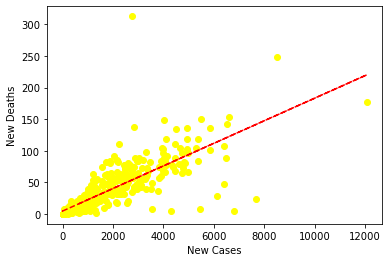

In [4]:
NewCases = df['new_cases']
NewDeaths = df['new_deaths']
slope, intercept, r, p, std_err = stats.linregress(NewCases, NewDeaths)

def myfunc(NewCases):
  return slope * NewCases + intercept

mymodel = list((map(myfunc, NewCases)))

plt.scatter(NewCases,NewDeaths,color='yellow')
plt.plot(NewCases,mymodel,color='red',linestyle='--')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.show()


# Analysis:

<br>
<font size=3>In our dataset we have applied linear regressions between new cases and new deaths where new cases is our explanatory variable and new deaths is our dependent variable. In the model below we can see that the prediction line (i.e the red line) shows the direction of the data and let us to predict that at particular number of cases what will be the number of deaths.<br>In the below model we can see that the yellow dots are showing the actual data which exists but in case we have no data on particular point then we can use the prediction line and can predict the number of deaths with respect to particular number of cases. This model is useful because we can’t have a count of deaths due to the population of the world is 7.2 billion and how many people are dying at every new case discovered.</font>

# Linear Regression Model between Total Cases and Deaths

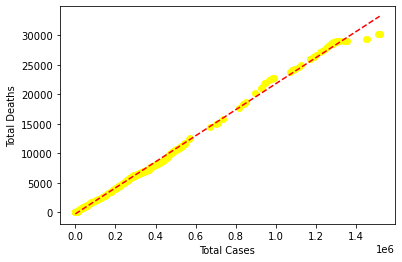

In [5]:
TotalCases = df['total_cases']
TotalDeaths = df['total_deaths']
slope, intercept, r, p, std_err = stats.linregress(TotalCases, TotalDeaths)

def myfunc(TotalCases):
  return slope * TotalCases + intercept

mymodel = list(map(myfunc, TotalCases))
plt.scatter(TotalCases,TotalDeaths,color='yellow')
plt.plot(TotalCases,mymodel,color='red',linestyle='--')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()

# Analysis:

<br>
<font size=3>As discussed above about linear regression here we are taking total deaths as dependent variable while the total cases are explanatory variable. This model is about commutative data which takes the total of the previous data and then predict the total deaths over the total cases reported until a particular date therefore we can see the dots of the data in a particular rhythm with the prediction line but this does not mean that the whole data is normal because we are dealing with two columns only moreover if wee see in the above model it is clear that the data is scattered. </font>

# Descriptive Statistics

In [6]:
df = pd.read_csv("Covid_Stats.csv")
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,new_vaccinations,stringency_index
count,7.960000e+02,796.000000,796.000000,796.000000,791.000000,6.810000e+02,619.000000,790.000000,790.000000,5.380000e+02,5.430000e+02,776.000000
mean,7.422330e+05,1919.542714,15987.468593,38.152010,1.002958,1.013747e+07,34050.303716,0.058558,36.942532,3.777594e+07,1.657756e+05,61.358054
std,5.036871e+05,1771.066460,10786.743411,38.099053,0.336141,8.549553e+06,16151.233291,0.049403,43.586911,6.889443e+07,4.102917e+05,13.615149
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,19.440000
25%,3.008090e+05,544.500000,6372.250000,7.000000,0.810000,2.277153e+06,23462.000000,0.020100,11.700000,0.000000e+00,0.000000e+00,50.460000
50%,6.611580e+05,1358.000000,14306.000000,28.000000,0.970000,8.041254e+06,37206.000000,0.046600,19.650000,0.000000e+00,0.000000e+00,63.430000
75%,1.261956e+06,2933.250000,28207.750000,59.000000,1.205000,1.752028e+07,45790.000000,0.081575,46.150000,4.199700e+07,0.000000e+00,68.520000
max,1.527956e+06,12073.000000,30369.000000,313.000000,2.650000,2.806695e+07,68002.000000,0.256200,307.800000,2.461811e+08,2.339218e+06,96.300000


# Analysis:

### Mean:
<br><font size=3>As mean gives the average value from the data, we also calculated the mean of different variables from our dataset that gave us the average of deaths, positive cases, new cases etc.</font>
### Standard Deviation:
<br><font size=3>Standard deviation is a measure of how dispersed the data is in relation to the mean. In our dataset for some columns as total cases, new cases and total deaths standard deviation is less than mean which tells that the data is clustered around the mean and for total tests, tests per case and total vaccinations standard deviation is greater which means that the data is spread out.</font>
### Minimum:
<br><font size=3>Min gives the minimum value and in total cases minimum value is 2 which most probably be at the time of start of the COVID but there is also a chance that this was at the end of COVID.</font>
### 25%:
<br><font size=3>From minimum to 25% there was a slight increase in the total cases, reproduction rate and positive rate and no change in total vaccinations. But there is a visible and high increase in new cases, total deaths, new deaths, total tests, new tests and tests per case.</font>
### 50%:
<br><font size=3>As from 25% to 50% it can be clearly seen that the total cases increased twice while the new cases, total deaths, new deaths, total tests etc. increased as a higher rate as compared to the total cases in fact every variable increased except the vaccinations also there was no visible difference in reproduction rate.</font>
### 75%:
<br><font size=3>But from 50% to 75% the total cases decreased at a much faster rate almost 6 times. New cases, total deaths and new deaths increased. Total tests decreased at a higher rate, there was no observational change in positive rates. There’s a visible increase in total vaccinations.<br><br>
From 75% to max total cases and positive rate almost did not change but only a minimal increase, but new cases, total deaths, new deaths reproduction rate, total tests, new tests and tests per case increased.  The only thing which decreased was the total vaccinations which decreased twice.
</font>

# Box Plot  

<br>
<font size=3>A box plot is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.</font>

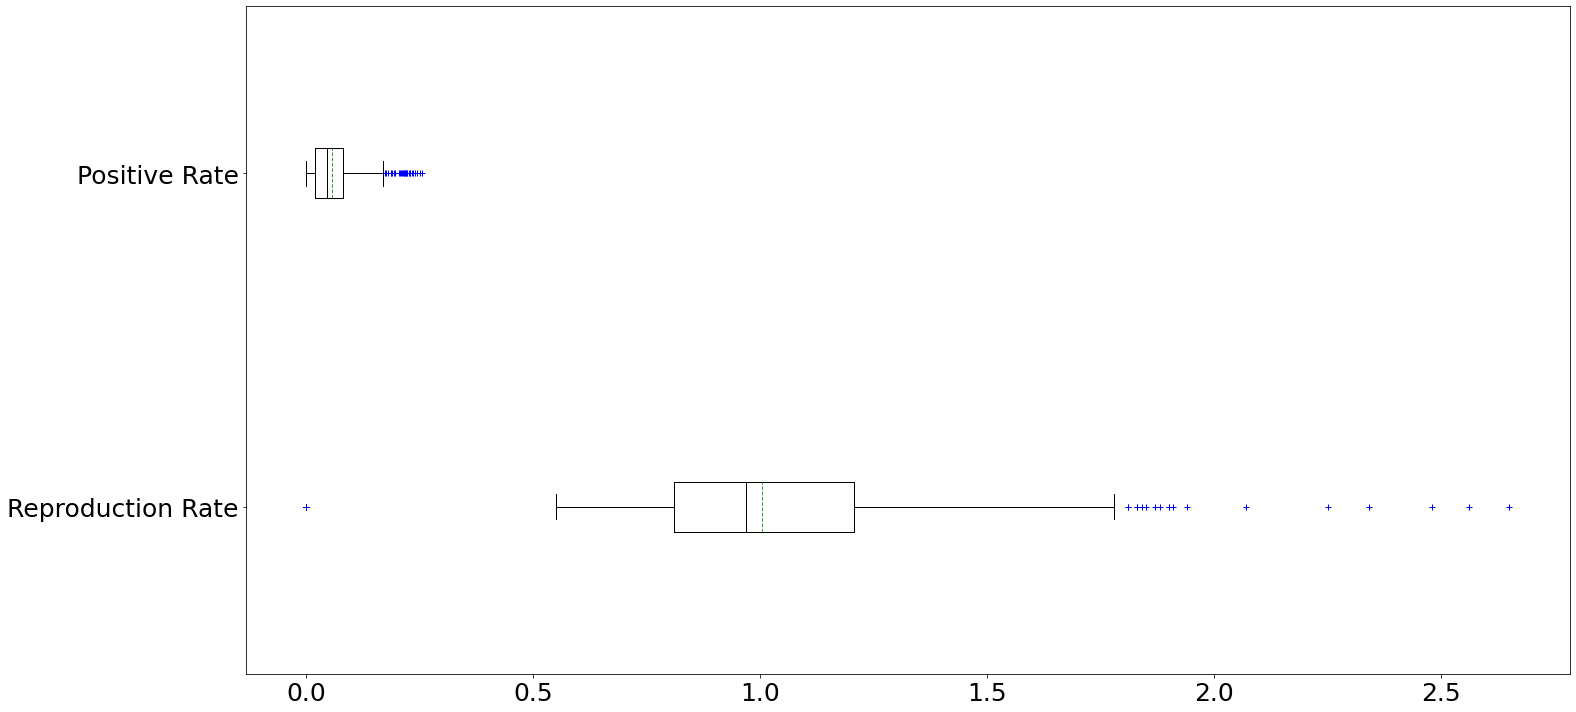

In [7]:
col_list=["positive_rate","reproduction_rate"]
df= pd.read_csv("Covid_Stats.csv", usecols=col_list)
df = df.replace('',np.nan)
df = df.dropna(axis="rows")
plt.rcParams["figure.figsize"] = [22, 10]
plt.rcParams["figure.autolayout"] = True
df = pd.DataFrame({"Reproduction Rate": df['reproduction_rate'], "Positive Rate": df['positive_rate']})
ax= df[['Reproduction Rate', 'Positive Rate']].plot(kind='box',fontsize=25,color='black',vert=False,sym='b+',showmeans=True,meanline=True)
plt.show()

# Analysis:

<br>
<font size=3>In our dataset we have applied the box plot on positive rate and reproduction rate variables. We can see in the model of reproduction rate that it is extending to a wide range and increasing while in the model of positive rate we can see that the range is small and they both have many outliers. 
The reason for the outliers is that the distribution is abnormal and due to the different waves of corona there are abnormal intervals.<br>
The reason for the positive rate to be decreasing is because as time passed people became more aware, followed SOPs and precautions and later on the vaccines were also introduced which caused the positive rate to decrease.
According to the international surveys, the rate of reproduction increased during this time of covid and this can be seen in the boxplot of reproduction rate.</font>


# Bar Chart

<br>
<font size=3>Bar graphs are the pictorial representation of data (generally grouped), in the form of vertical or horizontal rectangular bars, where the lengths of bars are proportional to the measure of data. They are also known as bar charts. Bar graphs are one of the means of data handling in statistics.</font>

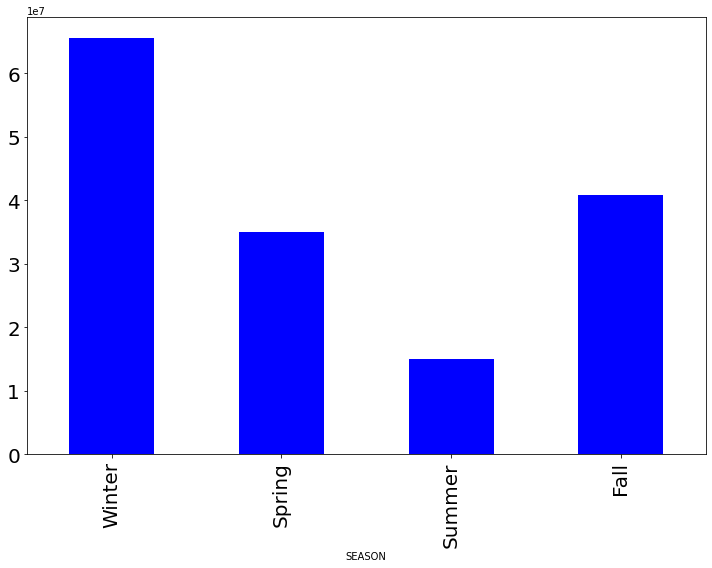

In [8]:
names =["date","total_vaccinations"]
data = pd.read_csv("Covid_Stats.csv",usecols=names, parse_dates=['date'],index_col=['date'], dayfirst=True)

data = data.replace('',np.nan)
data = data.dropna(axis="rows")


spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

def season(x):
    if x in spring:
       return 'Spring'
    if x in summer:
       return 'Summer'
    if x in fall:
       return 'Fall'
    else :
       return 'Winter'


data['SEASON'] = pd.cut(
    (data.index.dayofyear + 11) % 366,
    [0, 91, 183, 275, 366],
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)


seasons = np.array(['Winter', 'Spring', 'Summer', 'Fall', 'Winter'])
f = np.searchsorted([80, 172, 264, 355], data.index.dayofyear)
plt.figure(figsize=(10,8))
data.groupby('SEASON')['total_vaccinations'].mean().plot.bar(fontsize=20,color='blue')

# Analysis:
<br>
<font size=3>In our dataset related to COVID we have plotted the bar graph between dates and vaccinations but because we have the data of two years so we categorized dates into four seasons. Now as we can see the bar graph that in winter season, we have the greatest number of vaccinations while in summers we have the least number of vaccinations. This is because according to WHO research the COVID wave hits more in winter so people take more precautions in winter as compared to summers.
<br><br><b>Note:</b> The number of vaccinations is very large hence taken in exponent.
</font>

# Pie Chart

<br>
<font size=3>A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents. While it is named for its resemblance to a pie which has been sliced, there are variations on the way it can be presented.</font>

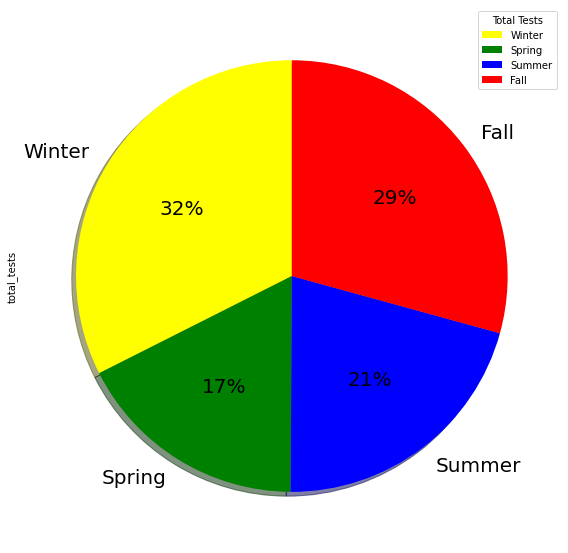

In [9]:
names =["date","total_tests"]
data = pd.read_csv("Covid_Stats.csv",usecols=names, parse_dates=['date'],index_col=['date'], dayfirst=True)

data = data.replace('',np.nan)
data = data.dropna(axis="rows")


spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

def season(x):
    if x in spring:
       return 'Spring'
    if x in summer:
       return 'Summer'
    if x in fall:
       return 'Fall'
    else :
       return 'Winter'


data['SEASON'] = pd.cut(
    (data.index.dayofyear + 11) % 366,
    [0, 91, 183, 275, 366],
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)
Mycolors=['yellow','green','blue','red']

seasons = np.array(['Winter', 'Spring', 'Summer', 'Fall', 'Winter'])
f = np.searchsorted([80, 172, 264, 355], data.index.dayofyear)
total=100
plt.figure(figsize=(8,10))
data.groupby('SEASON')['total_tests'].mean().plot.pie(autopct=lambda p: '{:.0f}%'.format(p * total / 100),fontsize=20,shadow=True,startangle=90,colors=Mycolors)
plt.legend(title = "Total Tests")

# Analysis:
<br><font size=3>We have plotted pie chart between the total tests and the seasons. The pie chart represents the percentage of tests which were done in a particular season. The chart below depicts that the most tests of COVID-19 were done in winter while in summers due the more cases reported in winters as discussed above. Another reason of the increment in the percentage of tests done in winter is that people travelled a lot in winter for which they had to do PCR.<br><br>Moreover, if we add all percentages, it will be $99\%$ which is an error, maybe it is because the data was not recorded or it was left from being plotted on the graph.</font>

# Line Plot

<br><font size=3>A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value. Here, for instance, the line plot shows the number of ribbons of each length. 
    <br><b>Fun Fact</b> – A line plot is often confused with a line graph.
</font>

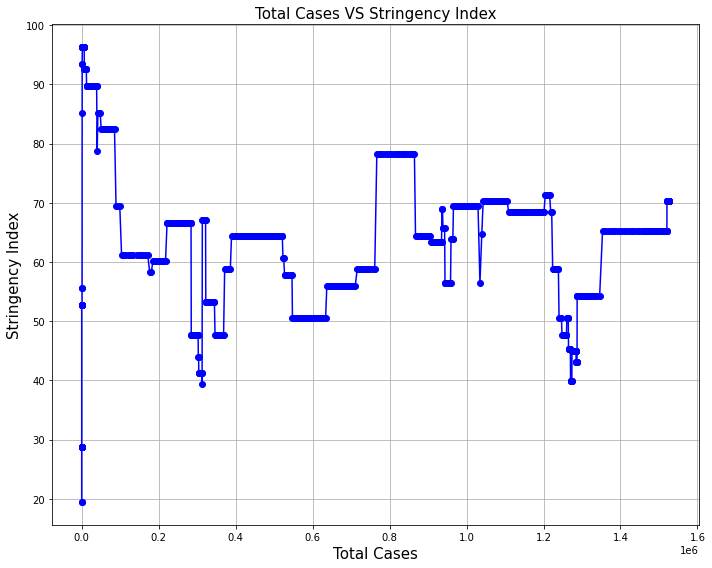

In [10]:
col_list=["total_cases","stringency_index"]
df= pd.read_csv("Covid_Stats.csv", usecols=col_list)
df = df.replace('',np.nan)
df = df.dropna(axis="rows")


plt.figure(figsize=(10,8))
plt.plot(df['total_cases'], df['stringency_index'], color='blue', marker='o')
plt.title('Total Cases VS Stringency Index', fontsize=15)
plt.xlabel('Total Cases', fontsize=15)
plt.ylabel('Stringency Index', fontsize=15)
plt.grid(True)
plt.show()

# Analysis:

### Stringency Index:
<font size=3> This index is actually based on nine parameters: school closures; workplace closures; cancellation of public events; restrictions on public gatherings; closures of public transport; stay-at-home requirements; public information campaigns; restrictions on internal movements; and international travel controls. We take the mean of these values and hence we call it stringency index.

<br><br>
In our dataset we have plotted a line plot between total cases and stringency index. As we can see in the plot that when the total cases were less the stringency index was very high but it varies at every point and it is not in particular pattern as sometimes the lockdown was for months, sometimes for days and sometimes it was a smart lockdown.</font>




# Histogram

<br><font size=3>A histogram is a graphical representation that organizes a group of data points into user-specified ranges.</font>

(array([186.,  84.,  67.,  43.,  51.,  44.,  32.,  44.,  43.,  25.]),
 array([       0. ,  2692901.6,  5385803.2,  8078704.8, 10771606.4,
        13464508. , 16157409.6, 18850311.2, 21543212.8, 24236114.4,
        26929016. ]),
 <a list of 10 Patch objects>)

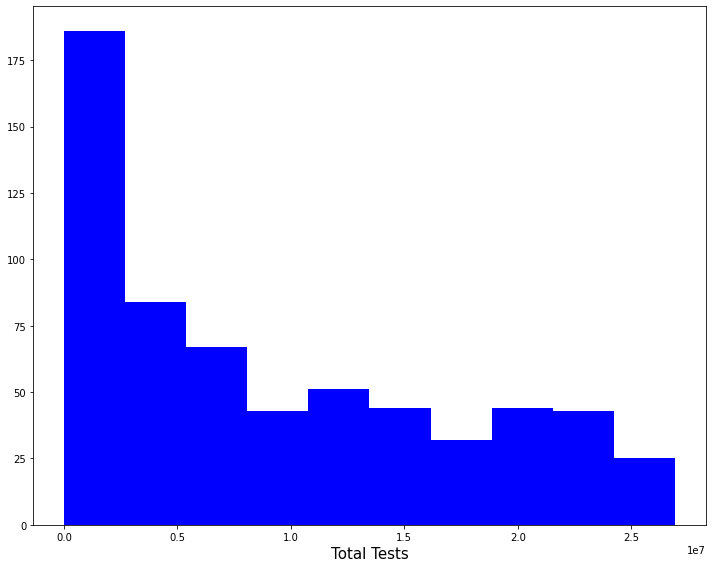

In [11]:
col_list=["total_tests","new_tests"]
df= pd.read_csv("Covid_Stats.csv", usecols=col_list)
df = df.replace('',np.nan)
df = df.dropna(axis="rows")
plt.figure(figsize=(10,8))
plt.xlabel("Total Tests",fontsize=15)
plt.hist(df['total_tests'],color='blue')

# Analysis:

<br><font size=3>Here, the histogram we plotted is with respect to the frequency of total tests over the time intervals.
We can see that the frequency of total tests was visibly high in the start of the covid wave but as covid started to become common and each and every person became their own doctors and were aware of the symptoms, they didn’t bother to conduct tests hence this result. Keep in mind, that these are the cumulative count of tests every day. But there were some points where the covid waves were at their peak and the state of fear forced the people to conduct tests. The distribution of the histogram is not in a definite pattern thus producing abnormality providing us with a skewed wave.
</font>

(array([ 58.,  31.,  20.,  84.,  75., 102., 124.,  75.,  36.,  14.]),
 array([    0. ,  6800.2, 13600.4, 20400.6, 27200.8, 34001. , 40801.2,
        47601.4, 54401.6, 61201.8, 68002. ]),
 <a list of 10 Patch objects>)

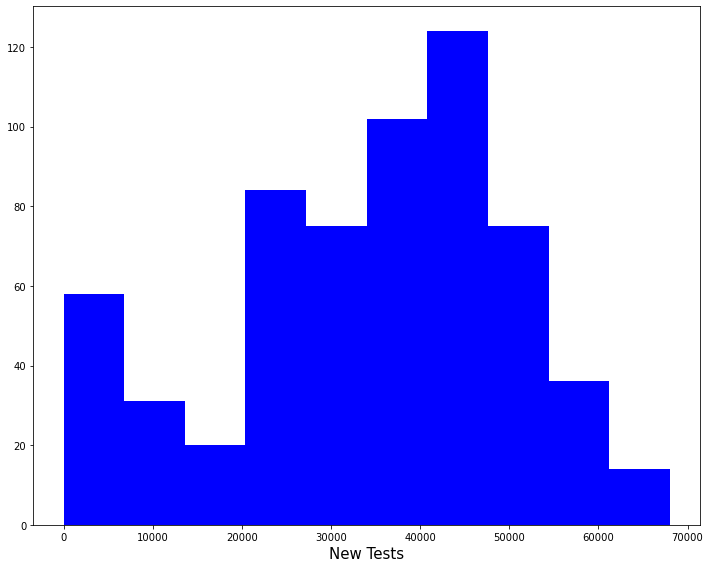

In [12]:
plt.figure(figsize=(10,8))
plt.xlabel("New Tests",fontsize=15)
plt.hist(df['new_tests'],color='blue')

# Analysis:

<br><font size=3>As far as the new tests are concerned, we can see the top most bar of the histogram is in the middle of the grid indicating that most of the new tests were conducted in the mid-season of corona where the pandemic was at its peak as the stringency index at that point started to decrease which started to effect the economical and national development of country. The world had literally stopped at that moment.
<br><br>Other than that, we can see slight increase at the start of some covid wave when the risk was high and then slowly decreasing. At the mere end of the covid pandemic we can see considerably see very few new tests as covid had not remained a death threat anymore.
</font>

# Checking Normality of Data

<br><font size=3>Normality refers to a specific statistical distribution called a normal distribution, or sometimes the Gaussian distribution or bell-shaped curve. The normal distribution is a symmetrical continuous distribution defined by the mean and standard deviation of the data.</font>
## Steps: 
### 1) Running Shapiro-Wilk Test
### 2) Running D’Agostino’s K-squared Test
### 3) Running Jerque Bera Test

# Shapiro-Wilk Test
<br>
<font size =3>
It is the most powerful test to check the normality of a variable. It was proposed in 1965 by <b>Samuel Sanford Shapiro</b> and <b>Martin Wilk</b>.
<br>    

**H0**: distribution of the sample is not significantly different from a normal distribution

**H1**: distribution of the sample is significantly different from a normal distribution

The Sharpiro-Wilk test statistics is defined as:

<font size="6">**$W = \frac{(\sum_{i=1}^{n}a_ix_{(i)})^2}{\sum_{i=1}^{n}(x_i–\bar{x})}$**</font>


where **$x(i)$** is the ith smallest number in the sample **$(x1<x2<…<xn)$**; and $a_i$ are constants generated from var, cov, mean for a normally distributed sample.</font>

In [13]:
df= pd.read_csv("Covid_Stats.csv")
df = df.replace('',np.nan)
df = df.dropna(axis="rows")

stat, p = shapiro(df['total_cases'])

print("Stat = %.3f, P = %.3f\n" % (stat, p))

if p > 0.05:
    print("Probably Normal")
else:
    print("May not be Normal")

Stat = 0.828, P = 0.000

May not be Normal


# Analysis:
<br>
<font size =3>
If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.


If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.</font>

# D’Agostino’s K-squared Test

<br>
<font size =3>
    
<b>D’Agostino’s K-squared</b> test check’s normality of a variable based on skewness and kurtosis. It was named by Ralph D’Agostino.

Skewness is a measure of symmetry.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.


The D’Agostino’s K-squared test statistics is defined as:

<font size=6>**$K^{2}=Z_{1}(g_{1})^{2}+Z_{2}(g_{2})^{2}$**</font></font>

In [14]:
stat, p = normaltest(df['total_cases'])

print("Stat = %.3f, P = %.3f\n" % (stat, p))

if p > 0.05:
    print("Probably Normal")
else:
    print("May not be Normal")

Stat = 75.332, P = 0.000

May not be Normal


# Analysis:
<br>
<font size =3>
If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.


If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.</font>

# Jarque Bera Test

<br>
<font size =3>
The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.

NOTE: This test only works for a large enough number of data samples

Its statistic is non-negative and large values signal significant deviation from normal distribution.

The test statistic JB of Jarque-Bera is defined by:

<font size=6>**$JB = \frac{n}{6}×(S^2+\frac{(K−3)}{2}^4)$**</font>

where S is the sample skewness, K is the sample kurtosis, and n is the sample size.

The hypotheses:

**H0** : sample S and sample K is not significantly different from normal distribution.<br>
**H1** : sample S and sample K is significantly different from normal distribution.<br><br>
Now we can calculate the Jarque-Bera test statistic in Python and find the corresponding p-value: </font>

In [15]:
stat, p = jarque_bera(df['total_cases'])

print("Stat = %.3f, P = %.3f\n" % (stat, p))

if p > 0.05:
    print("Probably Normal")
else:
    print("May not be Normal")

Stat = 113.130, P = 0.000

May not be Normal


# Analysis:
<br>
<font size =3>
If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.


If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.</font>

# Conclusion 
<br><font size=3>Since, we ran all the tests to check the normality and expectedly as we stated in the previous assumptions by looking at the graphs, the dataset is not normally distributed. To assure, we ran the Jarque Bera test which is only built for large datasets, and as a conclusion we got the same result. In all the cases, the null hypothesis was accepted.</font>

# Hypothesis Testing
<br>
<font size =3>
<b>Hypothesis testing</b> is a scientific process used to investigate the acceptance or rejection of a proposition under consideration. Two approaches are used in statistics to verify a hypothesis:<br> 

- Parametric approach 

- Nonparametric approach. 

The most important aspect of the parametric approach is the satisfaction of the assumption about data’s normality, and a few tests require the equality of population variances. In most situations, the distributional assumption under a parametric test hardly satisfy, and the use of nonparametric or distribution-free tests is a common practice. However, all such nonparametric tests apply to data containing determined observations. In real life, there are various scenarios where we have non-precise data, and in such cases, the existing hypothesis testing approach based on classical test statistics cannot be implemented.</font>

# Neutrosophic Kruskal Wallis H Test

### Background:
<br>
<font size =3><b>Kruskal-Wallis H</b> test from the bank of classical statistics tests is a well-known <b>nonparametric</b> alternative to a one-way analysis of variance. The test is extensively used in decision-making problems where one has to compare the equality of several means when the observations are in exact form. The test is helpless when the data is in an interval form and has some indeterminacy.</font>


### Functionality:
<font size =3>A Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups.</font>


### Reason behind the selection of this method:
<br>
<font size =3>
The basic purpose of suggesting the Kruskal Wallis test is to scrutinize that all independent samples containing neutrosophic observations come from neutrosophic populations with equal means implying that the populations under uncertainty are identical. The proposed nonparametric test is applicable for data where the measure of uncertainty or the measure of falseness has been recorded. <br>Suppose $XN = aN + bNIN; XN ∈ [XL, XU]$ is a neutrosophic number where the first part represents the measure of determinacy and the second part represents the measure of vagueness or uncertainty. For $IN ∈ [IL, IU] = 0$, the neutrosophic number reduces to a random variable under classical statistics. The neutrosophic variable $XN$ represents the neutrosophic sample obtained from the population containing imprecise, uncertain, and indeterminate observations.</font>

Stat = 21.429, P = 0.000

Null Hypothesis is rejected!


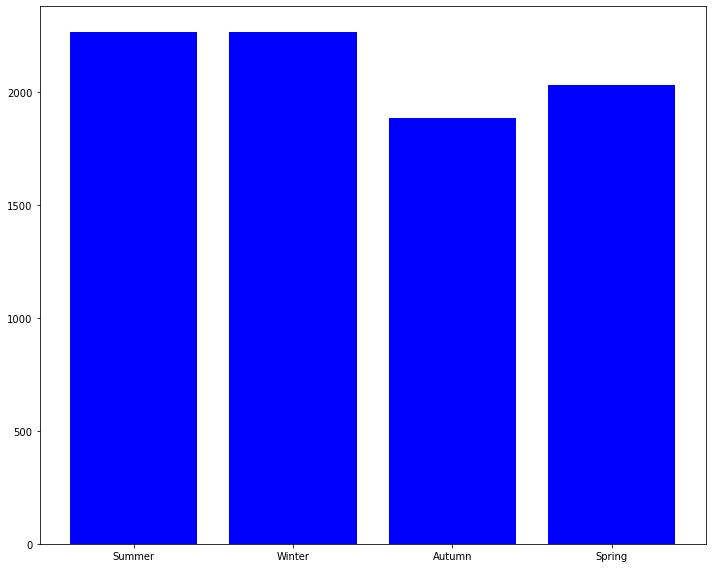

In [16]:
names=["date","new_cases"]
data = pd.read_csv("Covid_Stats.csv",usecols=names, parse_dates=['date'],index_col=['date'], dayfirst=True)

data = data.replace('',np.nan)
data = data.dropna(axis="rows")


#winter dataframes
w1 = data['25-02-2020':'29-02-2020']
w2 = data['01-11-2020':'28-02-2021']
w3 = data['01-11-2020':'28-02-2022']
#summer dataframes
su1 = data['01-05-2020':'31-08-2020']
su2 = data['01-05-2021':'31-08-2021']
#autumn dataframes
a1 = data['01-09-2020':'31-10-2020']
a2 = data['01-09-2021':'31-10-2021']
#spring dataframes
s1 = data['01-03-2020':'30-04-2020']
s2 = data['01-03-2021':'30-04-2021']
s3 = data['01-03-2022':'30-04-2022']


Summer = [su1,su2]
Summer = pd.concat(Summer)
Winter = [w1,w2,w3]
Winter = pd.concat(Winter)
Autumn = [a1,a2]
Autumn = pd.concat(Autumn)
Spring = [s1,s2,s3]
Spring = pd.concat(Spring)

labels=['Summer','Winter','Autumn','Spring']
dff= [Summer.mean(),Spring.mean(),Winter.mean(),Autumn.mean()]

val=[2264.161215,2264.161215,1884.315315,2029.327839]
plt.figure(figsize=(10,8))
plt.bar(labels,val,color='b')


stat,p= stats.kruskal(Summer,Winter,Autumn,Spring)

print("Stat = %.3f, P = %.3f\n" % (stat, p))

if p > 0.5:
    print("Null Hypothesis is accepted! ")
else:
    print("Null Hypothesis is rejected!")

# Analysis:

<br><font size=3>
Since this p-value is less than 0.05, we can reject the null hypothesis that the spread and occurence of new cases was the same in all four seasons. We have sufficient evidence to conclude that there was a vast difference in the statistical change of new covid cases.</font>